In [1]:
import pandas as pd
reviews = pd.read_csv('manga_reviews.csv')
reviews

,Unnamed: 0,title,url,reviews
0,0,['Berserk'],https://myanimelist.net/manga/2/Berserk,"[""Story - 9.38\n\r\nThe first three volumes ma..."
1,1,['JoJo no Kimyou na Bouken Part 7: Steel Ball ...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,['Serving as a soft reset for Jojo\'s Bizarre ...
2,2,['Vagabond'],https://myanimelist.net/manga/656/Vagabond,"['Some seinen manga, I believe, take the meani..."
3,3,['One Piece'],https://myanimelist.net/manga/13/One_Piece,['Frequently categorized with both Bleach and ...
4,4,['Monster'],https://myanimelist.net/manga/1/Monster,"[""I rarely give tens to mangas. But this one j..."
...,...,...,...,...
92,92,['Tobaku Datenroku Kaiji: One Poker-hen'],https://myanimelist.net/manga/61579/Tobaku_Dat...,"[""You know, I will not write a huge review abo..."
93,93,['Dungeon Meshi'],https://myanimelist.net/manga/85781/Dungeon_Meshi,"['Dungeon Meshi has been a wonderful, overwhel..."
94,94,"['Umarekawattemo Mata, Watashi to Kekkon shite...",https://myanimelist.net/manga/114043/Umarekawa...,"[""Never did I expect that I would cry and be h..."
95,95,['Suzumiya Haruhi Series'],https://myanimelist.net/manga/3083/Suzumiya_Ha...,['Read Vol. 1 - 9\n\r\nHaruhi Suzumiya is a co...


In [3]:
reviews_column = reviews['reviews']
reviews_column

0     ["Story - 9.38\n\r\nThe first three volumes ma...
1     ['Serving as a soft reset for Jojo\'s Bizarre ...
2     ['Some seinen manga, I believe, take the meani...
3     ['Frequently categorized with both Bleach and ...
4     ["I rarely give tens to mangas. But this one j...
                            ...                        
92    ["You know, I will not write a huge review abo...
93    ['Dungeon Meshi has been a wonderful, overwhel...
94    ["Never did I expect that I would cry and be h...
95    ['Read Vol. 1 - 9\n\r\nHaruhi Suzumiya is a co...
96    ['Just by looking at the cover picture, you ca...
Name: reviews, Length: 97, dtype: object

In [11]:
!pip install transformers
from transformers import pipeline
sentiment_analysis_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [27]:
def analyze_sentiment(reviews):
    results = []
    for review in reviews:
        chunks = [review[i:i+512] for i in range(0, len(review), 512)]
        chunk_results = [result['label'] for chunk in chunks for result in sentiment_analysis_pipeline(chunk)]
        results.append(chunk_results)
    return results
reviews['sentiment'] = analyze_sentiment(reviews['reviews'])

In [28]:
reviews

,Unnamed: 0,title,url,reviews,sentiment
0,0,['Berserk'],https://myanimelist.net/manga/2/Berserk,"[""Story - 9.38\n\r\nThe first three volumes ma...","[POSITIVE, POSITIVE, POSITIVE, NEGATIVE, POSIT..."
1,1,['JoJo no Kimyou na Bouken Part 7: Steel Ball ...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,['Serving as a soft reset for Jojo\'s Bizarre ...,"[POSITIVE, NEGATIVE, POSITIVE, POSITIVE, POSIT..."
2,2,['Vagabond'],https://myanimelist.net/manga/656/Vagabond,"['Some seinen manga, I believe, take the meani...","[POSITIVE, POSITIVE, POSITIVE, POSITIVE, POSIT..."
3,3,['One Piece'],https://myanimelist.net/manga/13/One_Piece,['Frequently categorized with both Bleach and ...,"[POSITIVE, NEGATIVE, POSITIVE, POSITIVE, POSIT..."
4,4,['Monster'],https://myanimelist.net/manga/1/Monster,"[""I rarely give tens to mangas. But this one j...","[POSITIVE, POSITIVE, POSITIVE, POSITIVE]"
...,...,...,...,...,...
92,92,['Tobaku Datenroku Kaiji: One Poker-hen'],https://myanimelist.net/manga/61579/Tobaku_Dat...,"[""You know, I will not write a huge review abo...","[NEGATIVE, NEGATIVE]"
93,93,['Dungeon Meshi'],https://myanimelist.net/manga/85781/Dungeon_Meshi,"['Dungeon Meshi has been a wonderful, overwhel...","[POSITIVE, POSITIVE, POSITIVE, NEGATIVE, POSIT..."
94,94,"['Umarekawattemo Mata, Watashi to Kekkon shite...",https://myanimelist.net/manga/114043/Umarekawa...,"[""Never did I expect that I would cry and be h...","[POSITIVE, POSITIVE, POSITIVE, POSITIVE, POSIT..."
95,95,['Suzumiya Haruhi Series'],https://myanimelist.net/manga/3083/Suzumiya_Ha...,['Read Vol. 1 - 9\n\r\nHaruhi Suzumiya is a co...,"[POSITIVE, POSITIVE, POSITIVE, POSITIVE, POSIT..."


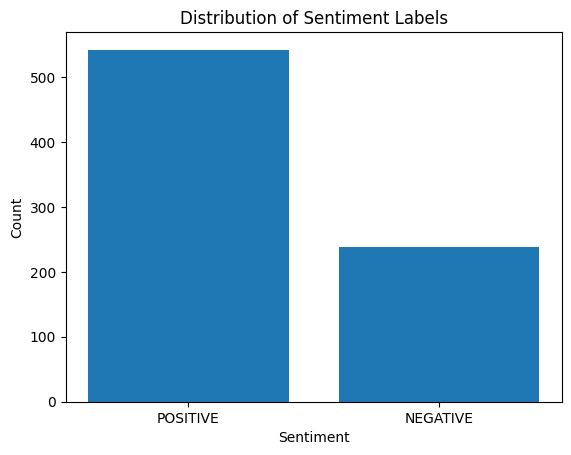

In [29]:
import matplotlib.pyplot as plt
flat_sentiments = [sentiment for sublist in reviews['sentiment'] for sentiment in sublist]
sentiment_counts = pd.Series(flat_sentiments).value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

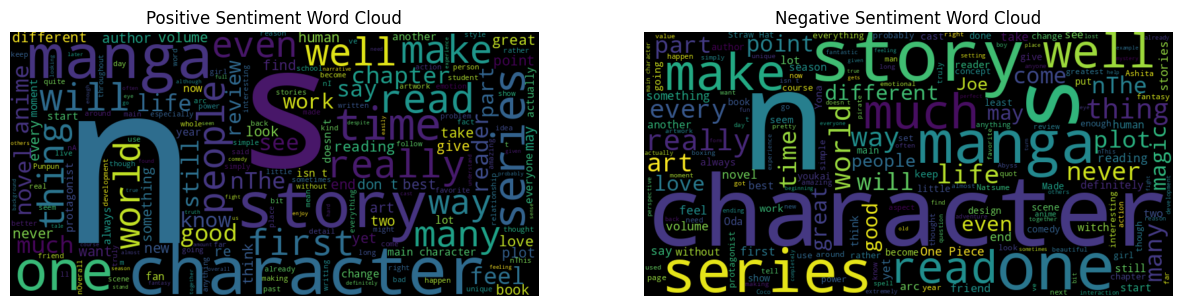

In [30]:
from wordcloud import WordCloud
positive_reviews = ' '.join([review for review, sentiment in zip(reviews['reviews'], flat_sentiments) if sentiment == 'POSITIVE'])
negative_reviews = ' '.join([review for review, sentiment in zip(reviews['reviews'], flat_sentiments) if sentiment == 'NEGATIVE'])
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()
#fix the reviews again, none of this makes sense

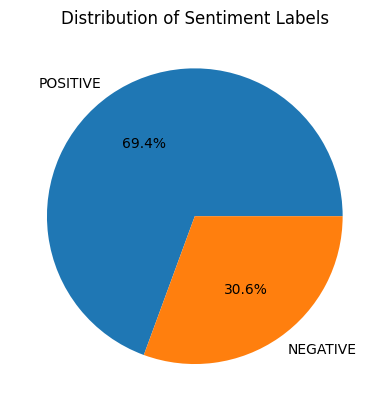

In [32]:
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [36]:
sentiment_distribution = reviews['sentiment'].apply(pd.Series).stack().value_counts()
print(sentiment_distribution)

POSITIVE    542
NEGATIVE    239
Name: count, dtype: int64


In [34]:
# Save the DataFrame to a CSV file
reviews.to_csv('sentiment_analysis.csv', index=False)